## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [3]:
features = []
remote_folder = '08_28_18_varying_PEG_redo' #Folder in AWS S3 containing files to be analyzed
bucket = 'evanepst.data'
vids = 10
covers = {'COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs'}

counter = 0
for cover in covers:
    for num in range(1, vids+1):
        
        filename = 'features_3mM_100_{}_XY{}.csv'.format(cover, '%02d' % num)
        print(filename)
        aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
        fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
        fstats['Percent Agarose'] = pd.Series(fstats.shape[0]*[cover], index=fstats.index)
        fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
        #print(num)
        counter = counter + 1
        if counter == 1:
            fstats_tot = fstats
        else:
            fstats_tot = fstats_tot.append(fstats, ignore_index=True)

features_3mM_100_COOH_XY01.csv
features_3mM_100_COOH_XY02.csv
features_3mM_100_COOH_XY03.csv
features_3mM_100_COOH_XY04.csv
features_3mM_100_COOH_XY05.csv
features_3mM_100_COOH_XY06.csv
features_3mM_100_COOH_XY07.csv
features_3mM_100_COOH_XY08.csv
features_3mM_100_COOH_XY09.csv
features_3mM_100_COOH_XY10.csv
features_3mM_100_pt15xs_XY01.csv
features_3mM_100_pt15xs_XY02.csv
features_3mM_100_pt15xs_XY03.csv
features_3mM_100_pt15xs_XY04.csv
features_3mM_100_pt15xs_XY05.csv
features_3mM_100_pt15xs_XY06.csv
features_3mM_100_pt15xs_XY07.csv
features_3mM_100_pt15xs_XY08.csv
features_3mM_100_pt15xs_XY09.csv
features_3mM_100_pt15xs_XY10.csv
features_3mM_100_pt10xs_XY01.csv
features_3mM_100_pt10xs_XY02.csv
features_3mM_100_pt10xs_XY03.csv
features_3mM_100_pt10xs_XY04.csv
features_3mM_100_pt10xs_XY05.csv
features_3mM_100_pt10xs_XY06.csv
features_3mM_100_pt10xs_XY07.csv
features_3mM_100_pt10xs_XY08.csv
features_3mM_100_pt10xs_XY09.csv
features_3mM_100_pt10xs_XY10.csv
features_3mM_100_pt40xs_XY01.c

In [5]:
fstats_tot.to_csv('features.csv')

In [6]:
#fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = ['Percent Agarose', 'Video Number', 'Track_ID']
fstats_num = fstats_tot.drop(nonnum, axis=1)
fstats_raw = fstats_num.values
#fstats

In [ ]:
fstats_tot[fstats_tot['Video Number']==1]

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [7]:
pcadataset = pca.pca_analysis(fstats_tot, dropcols=nonnum, n_components=8)

Cumulative explained variance:
0 component: 0.2652507509132382
1 component: 0.381069831592488
2 component: 0.48479609546038427
3 component: 0.5812999229606031
4 component: 0.6535782017595352
5 component: 0.7041861773767559
6 component: 0.7531510662698496
7 component: 0.8010708574091453


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [8]:
kmostat = pca.kmo(pcadataset.scaled)

0.957034920151


kmo results: 

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [9]:
import numpy as np
ncomp = 8
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pcadataset.final[pcadataset.final['Percent Agarose']=='COOH'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pcadataset.final[pcadataset.final['Percent Agarose']=='pt10xs'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pcadataset.final[pcadataset.final['Percent Agarose']=='pt15xs'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pcadataset.final[pcadataset.final['Percent Agarose']=='pt25xs'].values[:, -ncomp:], axis=0)
dicti[4] = np.nanmean(pcadataset.final[pcadataset.final['Percent Agarose']=='pt40xs'].values[:, -ncomp:], axis=0)

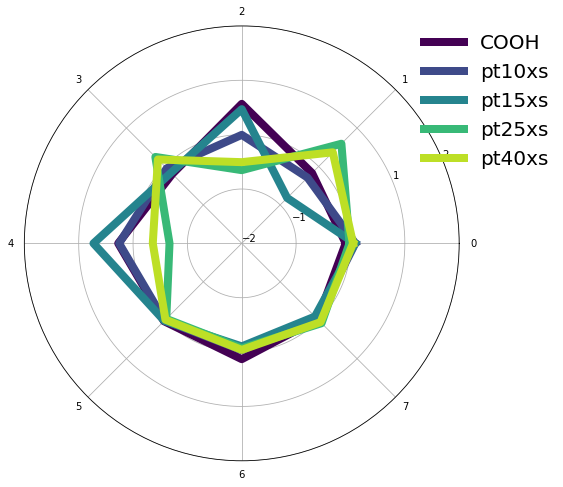

In [11]:
covers = ['COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs']
pca.plot_pca(dicti, savefig=True, labels=covers)

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [12]:
pcadataset.prcomps

,0,1,2,3,4,5,6,7
0,asymmetry1,MSD_ratio,AR,X,fractal_dim,SN_Ratio,Deff1,Quality
1,alpha,elongation,Deff2,Y,Deff2,Quality,fractal_dim,Mean_Intensity
2,efficiency,kurtosis,D_fit,alpha,MSD_ratio,Mean_Intensity,AR,MSD_ratio
3,Y,asymmetry2,kurtosis,asymmetry1,D_fit,D_fit,D_fit,D_fit
4,boundedness,Deff2,asymmetry2,asymmetry3,X,Deff1,frames,SN_Ratio


In [ ]:
import numpy as np
dicti = {}
dicti[0] = np.nanstd(pcadataset.final[pcadataset.final['Percent Agarose']==0.4].as_matrix(), axis=0)[-ncomp:]
dicti[1] = np.nanstd(pcadataset.final[pcadataset.final['Percent Agarose']==1.2].as_matrix(), axis=0)[-ncomp:]

In [ ]:
pca.plot_pca(dicti, savefig=True, labels=['0.4%', '1.2%'], rticks=np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5]))

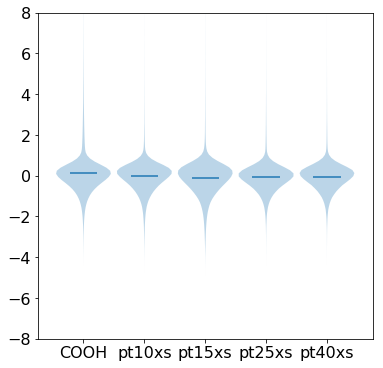

In [15]:
import diff_classifier.features as ft
tgroups = {}
counter = 0
for cover in covers:
    tgroups[counter] = pcadataset.final[pcadataset.final['Percent Agarose']==cover]
    counter = counter + 1
ft.feature_violin(tgroups, points=160, feature=6, ylim=[-8, 8], labels=covers, nticks=9)

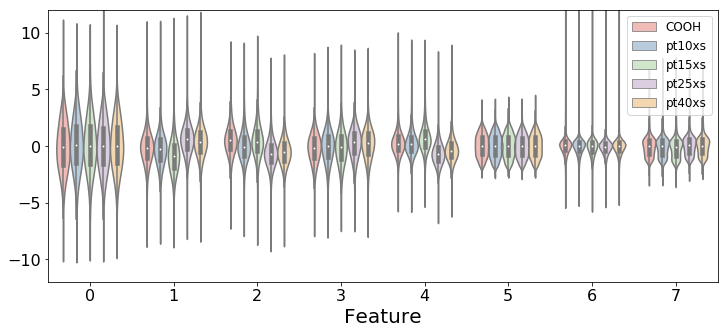

In [19]:
feats = pca.feature_violin(pcadataset.final, label='Percent Agarose', lvals=['COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs'],
                           fsubset=8, yrange=[-12, 12])

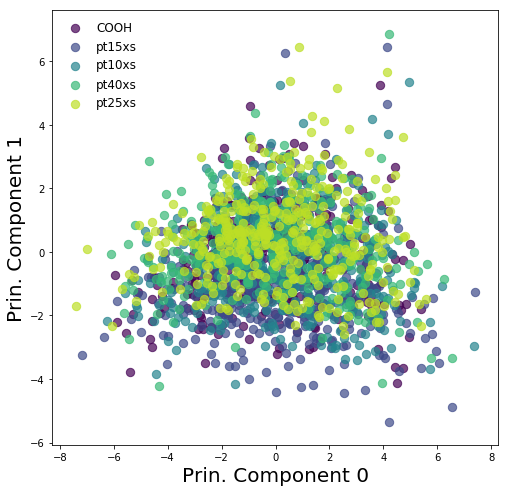

In [20]:
fstats1 = pca.feature_plot_2D(pcadataset.final, label='Percent Agarose', lvals=['COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs'],
                              randcount=400, yrange=[-8, 8],
                              xrange=[-8, 8])

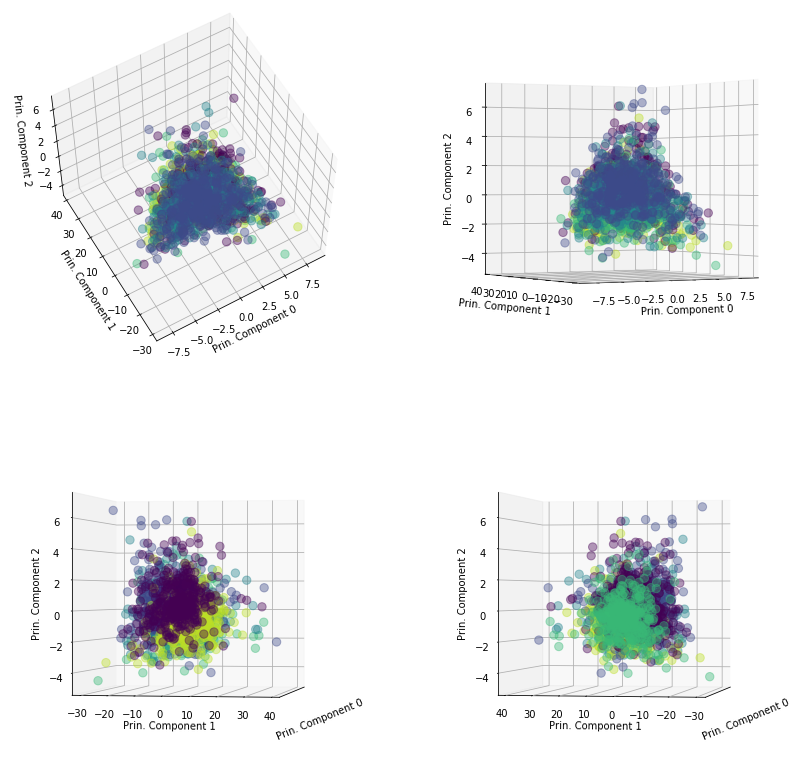

In [30]:
fstats1 = pca.feature_plot_3D(pcadataset.final, label='Percent Agarose', lvals=['COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs'],
                              randcount=400, yrange=[-8, 8],
                              xrange=[-8, 8], zrange=[-8, 8], alpha=0.4)

In [25]:
#ncomp = 8
trainp = np.array([])
testp = np.array([])

for i in range(0, 3):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final, 'Percent Agarose', ['COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs'],
                                       equal_sampling=True,
                                       tsize=1000, n_neighbors=8, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final.values[:, -ncomp:]
    y2 = pcadataset.final['Percent Agarose'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))
    print(i)

0
1
2


In [23]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.5339733333333333 +/ 0.00757464777325579
0.3524402852971941 +/ 0.0027304970998481112


In [26]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.5157999999999999 +/ 0.006433246976967899
0.369058032652467 +/ 0.0021056403951684277


In [31]:
#only COOH
#ncomp = 8
trainp = np.array([])
testp = np.array([])

for i in range(0, 3):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final, 'Percent Agarose', ['COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs'],
                                       equal_sampling=True,
                                       tsize=1000, n_neighbors=8, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Percent Agarose']=='COOH'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Percent Agarose']=='COOH']['Percent Agarose'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))
    print(i)

0
1
2


In [32]:
print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0.504 +/ 0.005516037224916681
0.4183254696892811 +/ 0.0022305017889710415


In [33]:
#only COOH
#ncomp = 8
trainp = np.array([])
testp = np.array([])

for i in range(0, 3):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final, 'Percent Agarose', ['COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs'],
                                       equal_sampling=True,
                                       tsize=1000, n_neighbors=8, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Percent Agarose']=='pt10xs'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Percent Agarose']=='pt10xs']['Percent Agarose'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))
    print(i)

print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0
1
2
0.5069333333333333 +/ 0.0035640177078996656
0.2690265821792032 +/ 0.007905377096839103


In [34]:
#only COOH
#ncomp = 8
trainp = np.array([])
testp = np.array([])

for i in range(0, 3):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final, 'Percent Agarose', ['COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs'],
                                       equal_sampling=True,
                                       tsize=1000, n_neighbors=8, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Percent Agarose']=='pt15xs'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Percent Agarose']=='pt15xs']['Percent Agarose'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))
    print(i)

print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0
1
2
0.5131333333333333 +/ 0.007394292092929235
0.39033283112519396 +/ 0.0063264416722538285


In [35]:
#only COOH
#ncomp = 8
trainp = np.array([])
testp = np.array([])

for i in range(0, 3):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final, 'Percent Agarose', ['COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs'],
                                       equal_sampling=True,
                                       tsize=1000, n_neighbors=8, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Percent Agarose']=='pt25xs'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Percent Agarose']=='pt25xs']['Percent Agarose'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))
    print(i)

print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0
1
2
0.5080666666666667 +/ 0.001892675942210482
0.39618000429897376 +/ 0.00957617358311656


In [36]:
#only COOH
#ncomp = 8
trainp = np.array([])
testp = np.array([])

for i in range(0, 3):
    KNNmod, X, y = pca.build_KNN_model(pcadataset.final, 'Percent Agarose', ['COOH', 'pt10xs', 'pt15xs', 'pt25xs', 'pt40xs'],
                                       equal_sampling=True,
                                       tsize=1000, n_neighbors=8, input_cols=ncomp)
    trainp = np.append(trainp, pca.predict_KNN(KNNmod, X, y))
    
    X2 = pcadataset.final[pcadataset.final['Percent Agarose']=='pt40xs'].values[:, -ncomp:]
    y2 = pcadataset.final[pcadataset.final['Percent Agarose']=='pt40xs']['Percent Agarose'].values
    testp = np.append(testp, pca.predict_KNN(KNNmod, X2, y2))
    print(i)

print('{} +/ {}'.format(np.mean(trainp), np.std(trainp)))
print('{} +/ {}'.format(np.mean(testp), np.std(testp)))

0
1
2
0.5031333333333333 +/ 0.0060538325785314635
0.2231187804967025 +/ 0.007808038804553054
